## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

### Question 1

In [1]:
import numpy as np
from types import SimpleNamespace

par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [2]:
from scipy import optimize

# The Consumer
def utility(c1,c2,l,par):
    """ utility of the consumer """
    
    return np.log(c1**par.alpha*c2**(1-par.alpha))-par.nu*l**(1+par.epsilon)/(1+par.epsilon)

def consumer(p1,p2,w,par):
    """ optimal consumer behavior """
    
    # define profits functions
    pi_1_star = ((1-par.gamma)/par.gamma)*w*(p1*par.A*par.gamma/w)**(1/(1-par.gamma))
    pi_2_star = ((1-par.gamma)/par.gamma)*w*(p2*par.A*par.gamma/w)**(1/(1-par.gamma))
    
    # define consumption functions
    def c1(l):
        c_1 = par.alpha*((w*l+par.T+pi_1_star+pi_2_star)/p1)
        return c_1
    
    def c2(l):
        c_2 = (1-par.alpha)*((w*l+par.T+pi_1_star+pi_2_star)/(p2+par.tau))
        return c_2
    
    # solve the maximization problem
    obj = lambda l: -utility(c1(l),c2(l),l,par)
    res = optimize.minimize_scalar(obj)
    
    # save
    l_star = res.x
    c_1_star = c1(l_star)
    c_2_star = c2(l_star)
    
    return l_star,c_1_star,c_2_star

# The Firms
def firms(p1,p2,w,par):
    """ optimal firm behavior """
    
    l_1_star = (p1*par.A*par.gamma/w)**(1/(1-par.gamma))
    l_2_star = (p2*par.A*par.gamma/w)**(1/(1-par.gamma))
    l_star_sum = l_1_star+l_2_star
    y_1_star = par.A*(l_1_star)**par.gamma
    y_2_star = par.A*(l_2_star)**par.gamma
    
    return l_star_sum,y_1_star,y_2_star,

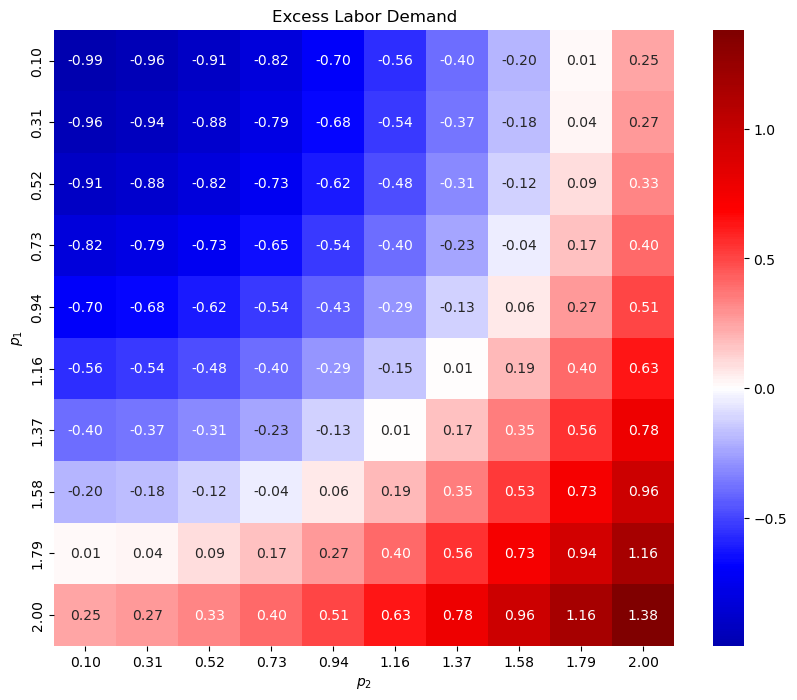

In [3]:
# Checking Labor Market Clearing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make DataFrame
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
eld_table = pd.DataFrame(index=p1_values, columns=p2_values)

# Compute excess labor demand and fill the DataFrame
w = 1
for p1 in p1_values:
    for p2 in p2_values:
        l, c_1, c_2 = consumer(p1, p2, w, par)
        l_f, y_1, y_2 = firms(p1, p2, w, par)
        
        ELD = l_f - l
        eld_table.at[p1, p2] = ELD

# Formatting the DataFrame
eld_table = eld_table.apply(pd.to_numeric)
eld_table.index = eld_table.index.map(lambda x: f"{x:.2f}")
eld_table.columns = eld_table.columns.map(lambda x: f"{x:.2f}")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eld_table, annot=True, fmt=".2f", cmap="seismic", center=0)
plt.title('Excess Labor Demand')
plt.xlabel(r'$p_2$')
plt.ylabel(r'$p_1$')
plt.show()

**Market clearing happens where excess demand is 0, i.e. somwhere in the (2 x 2) interval squares where excess demand changes sign (and color from red to blue) in both directions.**

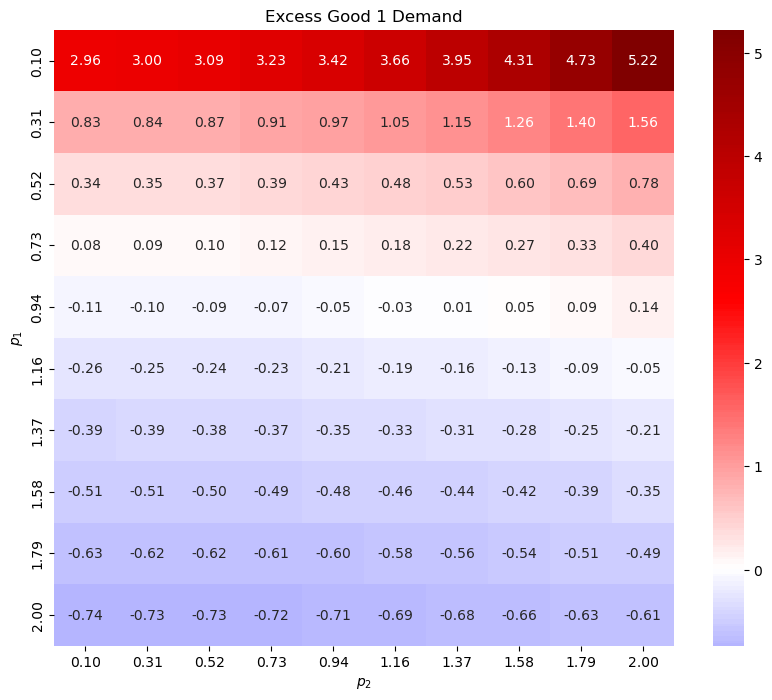

In [4]:
# Checking Good Market 1 Clearing

# Make DataFrame
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
egd_1_table = pd.DataFrame(index=p1_values, columns=p2_values)

# Compute excess good 1 demand and fill the DataFrame
w = 1
for p1 in p1_values:
    for p2 in p2_values:
        l, c_1, c_2 = consumer(p1, p2, w, par)
        l_f, y_1, y_2 = firms(p1, p2, w, par)
        
        EGD_1 = c_1 - y_1
        egd_1_table.at[p1, p2] = EGD_1

# Formatting the DataFrame
egd_1_table = egd_1_table.apply(pd.to_numeric)
egd_1_table.index = egd_1_table.index.map(lambda x: f"{x:.2f}")
egd_1_table.columns = egd_1_table.columns.map(lambda x: f"{x:.2f}")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(egd_1_table, annot=True, fmt=".2f", cmap="seismic", center=0)
plt.title('Excess Good 1 Demand')
plt.xlabel(r'$p_2$')
plt.ylabel(r'$p_1$')
plt.show()

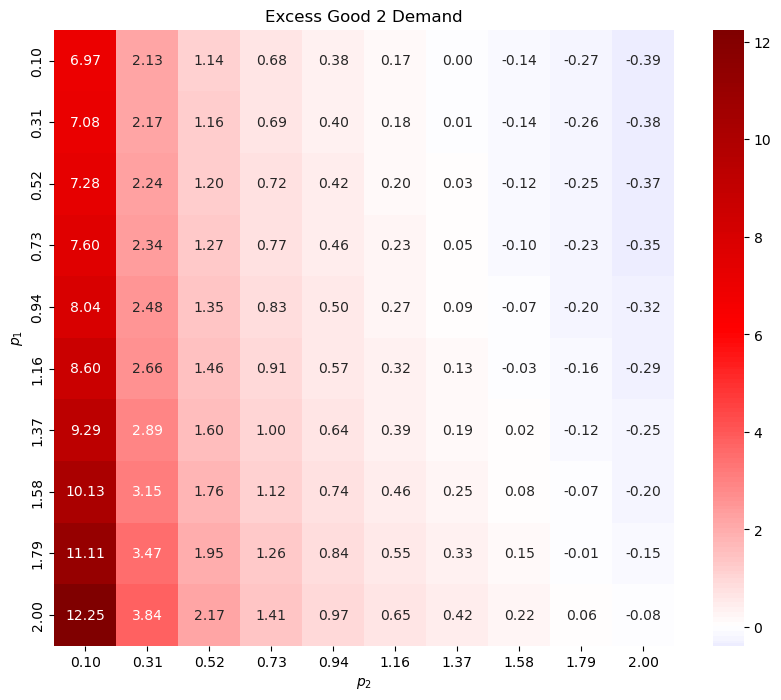

In [5]:
# Checking Good Market 2 Clearing

# Make DataFrame
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
egd_2_table = pd.DataFrame(index=p1_values, columns=p2_values)

# Compute excess good 2 demand and fill the DataFrame
w = 1
for p1 in p1_values:
    for p2 in p2_values:
        l, c_1, c_2 = consumer(p1, p2, w, par)
        l_f, y_1, y_2 = firms(p1, p2, w, par)
        
        EGD_2 = c_2 - y_2
        egd_2_table.at[p1, p2] = EGD_2

# Formatting the DataFrame
egd_2_table = egd_2_table.apply(pd.to_numeric)
egd_2_table.index = egd_2_table.index.map(lambda x: f"{x:.2f}")
egd_2_table.columns = egd_2_table.columns.map(lambda x: f"{x:.2f}")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(egd_2_table, annot=True, fmt=".2f", cmap="seismic", center=0)
plt.title('Excess Good 2 Demand')
plt.xlabel(r'$p_2$')
plt.ylabel(r'$p_1$')
plt.show()

### Question 2

In [6]:
# Finding the Equilibrium Prices

def evaluate_equilibrium(w,par,p1,p2):
    """ evaluate equilirium """
    
    # optimal behavior of the consumer
    l, c_1, c_2 = consumer(p1, p2, w, par)
    
    # optimal behavior of the firms
    l_f, y_1, y_2 = firms(p1, p2, w, par)
 
    # market clearing
    EGD_1 = c_1 - y_1
    EGD_2 = c_2 - y_2
    ELD = l_f - l
    
    return EGD_1,EGD_2,ELD

# Objective function for optimization
def objective(prices, w, par):
    p1, p2 = prices
    EGD_1, EGD_2, ELD = evaluate_equilibrium(w, par, p1, p2)
    
    # aggregate the absolute values of the market clearing conditions
    return np.abs(EGD_1) + np.abs(EGD_2) + np.abs(ELD)

# Initial guess for prices
initial_guess = [1.0, 1.0]

# Optimization
w = 1
result = optimize.minimize(objective, initial_guess, args=(w, par), method='Nelder-Mead')

# Optimal prices
optimal_p1, optimal_p2 = result.x

# Optimal behavior
l_opt, c_1_opt, c_2_opt = consumer(optimal_p1, optimal_p2, w, par)
l_f_opt, y_1_opt, y_2_opt = firms(optimal_p1, optimal_p2, w, par)

# Optimal utility and profit
U_opt = utility(c_1_opt,c_2_opt,l_opt,par)
pi_1_opt = ((1-par.gamma)/par.gamma)*w*(optimal_p1*par.A*par.gamma/w)**(1/(1-par.gamma))
pi_2_opt = ((1-par.gamma)/par.gamma)*w*(optimal_p2*par.A*par.gamma/w)**(1/(1-par.gamma))

print(f'Equilibrium Prices (p_1 , p_2) = ({optimal_p1:.3f} , {optimal_p2:.3f})')
print()
print(f'->     l = {l_opt:.3f}     (l_1 + l_2) = {l_f_opt:.3f}')
print(f'->   y_1 = {y_1_opt:.3f}             c_1 = {c_1_opt:.3f}')
print(f'->   y_2 = {y_2_opt:.3f}             c_2 = {c_2_opt:.3f}')
print()
print(f'->     U = {U_opt:.3f}')
print(f'->  pi_1 = {pi_1_opt:.3f}')
print(f'->  pi_2 = {pi_2_opt:.3f}')

Equilibrium Prices (p_1 , p_2) = (0.976 , 1.491)

->     l = 0.794     (l_1 + l_2) = 0.794
->   y_1 = 0.488             c_1 = 0.488
->   y_2 = 0.745             c_2 = 0.745

->     U = -0.588
->  pi_1 = 0.238
->  pi_2 = 0.556


**The equilibrium prices are $p_1=0.976$ and $p_2=1.491$**

### Question 3

When $\tau$ and $T$ are chosen by the government they become endogenous variables. To find the value of $\tau$ that maximizes $SWF$ in equilibrium we first have to derive the optimal consumer behavior when $T=\tau c_2^*$.


1) Inserting $T=\tau c_2$ into $c_{2}(\ell)$ and solving for $c_2$ yields
   $$
   \begin{align*}
   c_{2}(\ell)&=(1-\alpha)\frac{w\ell+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\alpha\tau}
   \end{align*}
   $$
   
2) Inserting $T=\tau c_2$ and the above expression for $c_2$ into $c_{1}(\ell)$ and solving for $c_1$ yields
   $$
   \begin{align*}
   c_{1}(\ell)&=\alpha\frac{w\ell+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}}*\frac{p_{2}+\tau}{p_{2}+\alpha\tau}
   \end{align*}
   $$


With optimal consumer behavior still defined as
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$

In [7]:
# The Consumer With Taxation
def consumer_tax(p1,p2,w,tau,par):
    """ optimal consumer behavior with taxation """
    
    # define profit functions
    pi_1_star = ((1-par.gamma)/par.gamma)*w*(p1*par.A*par.gamma/w)**(1/(1-par.gamma))
    pi_2_star = ((1-par.gamma)/par.gamma)*w*(p2*par.A*par.gamma/w)**(1/(1-par.gamma))
    
    # define the new consumption functions
    def c1_tax(l):
        c_1 = par.alpha*((w*l+pi_1_star+pi_2_star)/p1*(p2+tau)/(p2+par.alpha*tau))
        return c_1
    
    def c2_tax(l):
        c_2 = (1-par.alpha)*((w*l+pi_1_star+pi_2_star)/(p2+par.alpha*tau))
        return c_2
    
    # solve the utility maximization problem
    obj = lambda l: -utility(c1_tax(l),c2_tax(l),l,par)
    res = optimize.minimize_scalar(obj)
    
    # save
    l_star = res.x
    c_1_star = c1_tax(l_star)
    c_2_star = c2_tax(l_star)
    
    return l_star,c_1_star,c_2_star

# Check with equilibrium prices and tau = 0
l_opt_tax, c1_opt_tax, c2_opt_tax = consumer_tax(optimal_p1,optimal_p2,1,0,par)
print(f'Check With Equilibrium Prices (p_1 , p_2) = ({optimal_p1:.3f} , {optimal_p2:.3f}) and tau = 0')
print(f'->  l = {l_opt_tax:.3f}, c_1 = {c1_opt_tax:.3f}, c_2 = {c2_opt_tax:.3f}')

Check With Equilibrium Prices (p_1 , p_2) = (0.976 , 1.491) and tau = 0
->  l = 0.794, c_1 = 0.488, c_2 = 0.745


In [8]:
# The Government
def government(p1,p2,w,par):
    """ optimal government behavior """
    
    # define social welfare function
    def SWF(tau):
        l_star, c_1_star, c_2_star = consumer_tax(p1,p2,w,tau,par)
        SWF = utility(c_1_star,c_2_star,l_star,par) - par.kappa*c_2_star
        return SWF
    
    # solve the SW maximization problem
    obj = lambda tau: -SWF(tau)
    res = optimize.minimize_scalar(obj)
    
    # save
    tau_star = res.x
    T_star = tau_star
    
    return tau_star

In [9]:
# Finding the Equilibrium Prices, Tau and Implied T
def evaluate_equilibrium_tax(w,par,p1,p2):
    """ evaluate equilirium """
    
    # optimal government behavior
    tau = government(p1, p2, w, par)
    
    # optimal behavior of the consumer
    l, c_1, c_2 = consumer_tax(p1, p2, w, tau, par)
    
    # optimal behavior of the firms (unaffected by tau)
    l_f, y_1, y_2 = firms(p1, p2, w, par)
 
    # market clearing
    EGD_1 = c_1 - y_1
    EGD_2 = c_2 - y_2
    ELD = l_f - l
    
    return EGD_1,EGD_2,ELD

# Objective function for optimization
def objective_tax(prices, w, par):
    p1, p2 = prices
    EGD_1, EGD_2, ELD = evaluate_equilibrium_tax(w, par, p1, p2)
    
    # Aggregate the absolute values of the market clearing conditions
    return np.abs(EGD_1) + np.abs(EGD_2) + np.abs(ELD)

# Initial guess for prices
initial_guess_tax = [1.0, 1.0]

# Optimization
w = 1
result_tax = optimize.minimize(objective_tax, initial_guess_tax, args=(w, par), method='Nelder-Mead')

# Optimal prices
optimal_p1_tax, optimal_p2_tax = result_tax.x

# Optimal behavior
tau_opt = government(optimal_p1_tax, optimal_p2_tax, w, par)
l_opt_tax, c_1_opt_tax, c_2_opt_tax = consumer_tax(optimal_p1_tax, optimal_p2_tax, w,tau_opt, par)
l_f_opt_tax, y_1_opt_tax, y_2_opt_tax = firms(optimal_p1_tax, optimal_p2_tax, w, par)

# Social welfare in optimum
SWF_opt = utility(c_1_opt_tax,c_2_opt_tax,l_opt_tax,par) - par.kappa*c_2_opt_tax

print(f'Equilibrium Prices (p_1 , p_2) = ({optimal_p1_tax:.3f} , {optimal_p2_tax:.3f})')
print()
print(f'->     l = {l_opt_tax:.3f}     (l_1 + l_2) = {l_f_opt_tax:.3f}')
print(f'->   y_1 = {y_1_opt_tax:.3f}             c_1 = {c_1_opt_tax:.3f}')
print(f'->   y_2 = {y_2_opt_tax:.3f}             c_2 = {c_2_opt_tax:.3f}')
print()
print(f'->   tau = {tau_opt:.3f}')
print(f'->     T = {tau_opt*y_2_opt_tax:.3f}')
print(f'->   SWF = {SWF_opt:.3f}')

/var/folders/ls/r01gyp3x7jl7dvwm2k42r4kh0000gn/T/ipykernel_32418/3984106560.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.log(c1**par.alpha*c2**(1-par.alpha))-par.nu*l**(1+par.epsilon)/(1+par.epsilon)


Equilibrium Prices (p_1 , p_2) = (1.014 , 1.465)

->     l = 0.794     (l_1 + l_2) = 0.794
->   y_1 = 0.507             c_1 = 0.507
->   y_2 = 0.733             c_2 = 0.733

->   tau = 0.171
->     T = 0.125
->   SWF = -0.662


**The government should thus choose $\tau=0.171$ and $T=0.125$ to maximize $SWF$ in equilibrium.**